In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from IPython.display import display
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [2]:
superstore = pd.read_excel("/Users/barborostasdemir/Desktop/VeriBilimi101/Proje/Superstore Dataset.xlsx")

In [3]:
superstore.head() # İlk 5 sütun getirmek için kullanırız.

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922


In [4]:
superstore["Sales"].mean() # değerlerin ortalamalarını almak için

227.567528937108

In [5]:
superstore.info() # veri seti hakkında bilgi almak için kullanırız.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  5899 non-null   int64         
 1   Order ID          5899 non-null   object        
 2   Order Date        5899 non-null   datetime64[ns]
 3   Ship Date         5899 non-null   datetime64[ns]
 4   Ship Mode         5899 non-null   object        
 5   Customer ID       5899 non-null   object        
 6   Customer Name     5899 non-null   object        
 7   Segment           5899 non-null   object        
 8   Country           5899 non-null   object        
 9   City              5899 non-null   object        
 10  State             5899 non-null   object        
 11  Region            5899 non-null   object        
 12  Product ID        5899 non-null   object        
 13  Category          5899 non-null   object        
 14  Sub-Category      5899 n

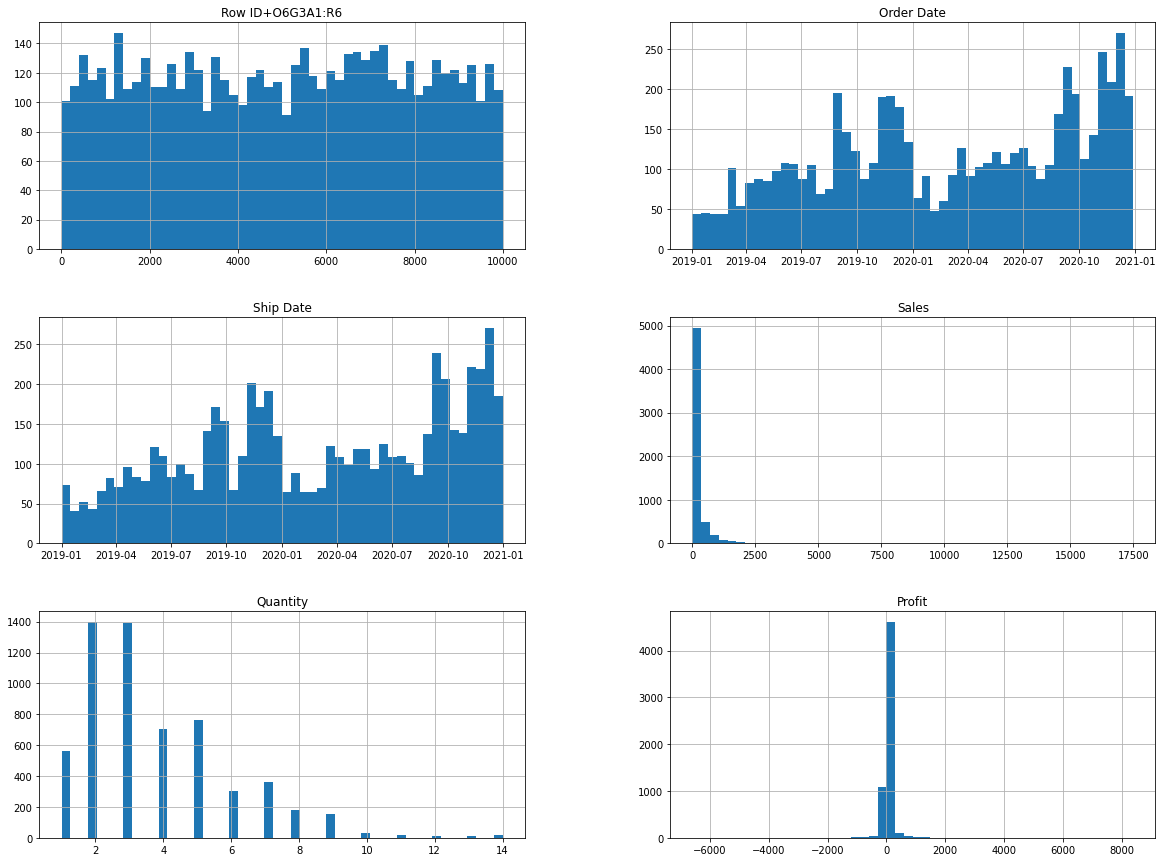

In [6]:
superstore.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
superstore["Sales"].isnull() # null değer var ise bunlara True cevabı yok ise False cevabını veriyor.

0       False
1       False
2       False
3       False
4       False
        ...  
5894    False
5895    False
5896    False
5897    False
5898    False
Name: Sales, Length: 5899, dtype: bool

In [8]:
superstore.isnull().sum() # null değerlerin toplamını veriyor.

Row ID+O6G3A1:R6    0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
dtype: int64

In [9]:
superstore.iloc[0]

Row ID+O6G3A1:R6                                    1
Order ID                               CA-2019-152156
Order Date                        2019-11-08 00:00:00
Ship Date                         2019-11-11 00:00:00
Ship Mode                                Second Class
Customer ID                                  CG-12520
Customer Name                             Claire Gute
Segment                                      Consumer
Country                                 United States
City                                        Henderson
State                                        Kentucky
Region                                          South
Product ID                            FUR-BO-10001798
Category                                    Furniture
Sub-Category                                Bookcases
Product Name        Bush Somerset Collection Bookcase
Sales                                          261.96
Quantity                                            2
Profit                      

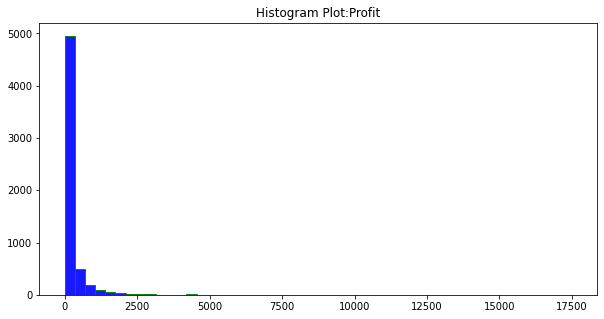

In [10]:
plt.subplots(figsize=(10, 5))
plt.title('Histogram Plot:Profit')
Sales = superstore["Sales"]
plt.hist(Sales,bins=50,alpha=0.9,histtype='bar',color='blue',edgecolor='green')
plt.show()

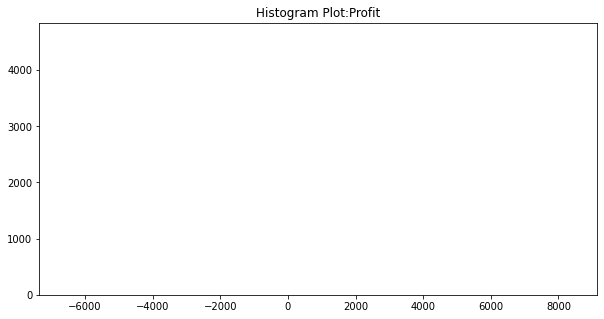

In [11]:
plt.subplots(figsize=(10, 5))
plt.title('Histogram Plot:Profit')
Profit = superstore["Profit"]
plt.hist(Profit,bins=50,alpha=0.,histtype='bar',color='blue',edgecolor='green')
plt.show()

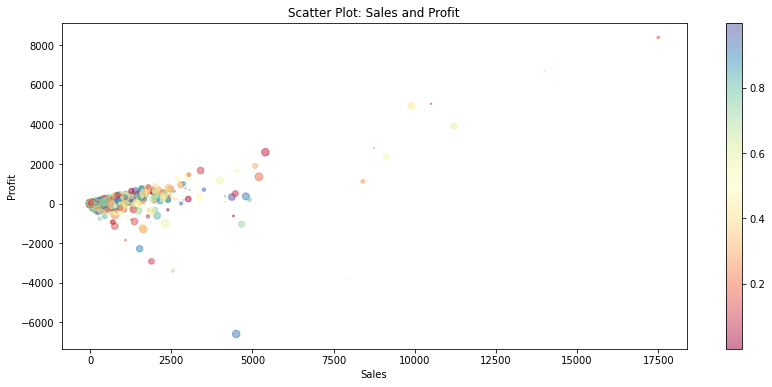

In [12]:
plt.figure(figsize=(14,6))
plt.rcParams['axes.grid']  = False # hataları bastırmak için kullanılır.
plt.title('Scatter Plot: Sales and Profit')

N = Sales.size
colors = np.random.rand(N)
area = np.pi * (20* np.random.rand(N)**2)

plt.xlabel('Sales')
plt.ylabel('Profit')

plt.scatter(Sales,Profit,s = area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

# Decision Tree

- Mean Model

In [13]:
(superstore.Sales-superstore.Sales.mean()).pow(2).sum()

2289080753.4506435

# first divide

In [14]:
filt = (superstore.Sales <=100.000)

In [15]:
superstore1 = superstore[filt]

In [16]:
superstore2 = superstore[~filt]

In [17]:
superstore1 # 100.000 bin değerinin altında olan değerleri filitreledik.

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
5,22,CA-2019-137330,2019-12-09,2019-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,5.0596
6,23,CA-2019-137330,2019-12-09,2019-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,Central,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,15.6884
7,24,US-2020-156909,2020-07-16,2020-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,-1.0196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5891,9984,US-2019-157728,2019-09-22,2019-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,27.4344
5892,9987,CA-2019-125794,2019-09-29,2019-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,15.2208
5893,9988,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,28.7964
5895,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332


In [18]:
superstore1.Sales.mean()

31.924738552596178

In [19]:
superstore2

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922
11,36,CA-2019-117590,2019-12-08,2019-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,123.4737
12,37,CA-2019-117590,2019-12-08,2019-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,9977,US-2019-103674,2019-12-06,2019-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,31.1980
5888,9980,US-2019-103674,2019-12-06,2019-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,153.1152
5894,9989,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,55.6470
5896,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,19.3932


# First Divide: Error

In [20]:
(superstore1.Sales - superstore1.Sales.mean()).pow(2).sum() + (superstore2.Sales - superstore2.Sales.mean()).pow(2).sum()

1904450086.6729207

# Second Divide :

In [21]:
filt2 = (superstore2.Sales <=150.000)

In [22]:
superstore3 = superstore2[filt2]

In [23]:
superstore4 = superstore2[~filt2]

In [24]:
superstore3

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
13,42,CA-2020-120999,2020-09-10,2020-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,16.5564
62,123,CA-2019-103730,2019-06-12,2019-06-15,First Class,SC-20725,Steven Cartwright,Consumer,United States,Wilmington,Delaware,East,OFF-EN-10002500,Office Supplies,Envelopes,Globe Weis Peel & Seel First Class Envelopes,115.020,9,51.7590
81,144,CA-2020-106180,2020-09-18,2020-09-23,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,San Francisco,California,West,OFF-PA-10004327,Office Supplies,Paper,Xerox 1911,143.700,3,68.9760
84,149,CA-2019-114489,2019-12-05,2019-12-09,Standard Class,JE-16165,Justin Ellison,Corporate,United States,Franklin,Wisconsin,Central,TEC-PH-10001448,Technology,Phones,Anker Astro 15000mAh USB Portable Charger,149.970,3,5.9988
106,208,CA-2020-135860,2020-12-01,2020-12-07,Standard Class,JH-15985,Joseph Holt,Consumer,United States,Saginaw,Michigan,Central,TEC-PH-10001700,Technology,Phones,Panasonic KX-TG6844B Expandable Digital Cordle...,131.980,2,35.6346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,9849,CA-2020-169327,2020-09-02,2020-09-04,Second Class,MH-17290,Marc Harrigan,Home Office,United States,Los Angeles,California,West,OFF-BI-10004330,Office Supplies,Binders,"GBC Velobind Prepunched Cover Sets, Regency Se...",147.920,5,46.2250
5837,9879,US-2020-166324,2020-04-20,2020-04-21,First Class,BE-11455,Brad Eason,Home Office,United States,Cleveland,Ohio,East,TEC-PH-10004080,Technology,Phones,Avaya 5410 Digital phone,122.382,3,-24.4764
5842,9892,US-2019-115441,2019-07-25,2019-07-28,Second Class,SH-19975,Sally Hughsby,Corporate,United States,Milwaukee,Wisconsin,Central,TEC-AC-10003116,Technology,Accessories,Memorex Froggy Flash Drive 8 GB,124.250,7,48.4575
5862,9937,CA-2020-132955,2020-06-24,2020-06-28,Standard Class,SC-20575,Sonia Cooley,Consumer,United States,Cranston,Rhode Island,East,OFF-BI-10002735,Office Supplies,Binders,GBC Prestige Therm-A-Bind Covers,102.930,3,48.3771


In [25]:
superstore3.Sales.mean()

122.32236883116883

In [26]:
superstore4

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922
11,36,CA-2019-117590,2019-12-08,2019-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,123.4737
12,37,CA-2019-117590,2019-12-08,2019-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,9977,US-2019-103674,2019-12-06,2019-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,31.1980
5888,9980,US-2019-103674,2019-12-06,2019-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,153.1152
5894,9989,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,55.6470
5896,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,19.3932


# Second Divide: Error

In [27]:
(superstore1.Sales - superstore1.Sales.mean()).pow(2).sum() + (superstore3.Sales - superstore3.Sales.mean()).pow(2).sum() + (superstore4.Sales - superstore4.Sales.mean()).pow(2).sum()

1814553149.7097495

## Üçüncü Bölme

In [ ]:
filt3 = (superstore3.Profit <=40.000)

In [ ]:
superstore5 = superstore3[filt3]

In [ ]:
superstore6 = superstore3[~filt3]

In [ ]:
superstore5

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
13,42,CA-2020-120999,2020-09-10,2020-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,16.5564
84,149,CA-2019-114489,2019-12-05,2019-12-09,Standard Class,JE-16165,Justin Ellison,Corporate,United States,Franklin,Wisconsin,Central,TEC-PH-10001448,Technology,Phones,Anker Astro 15000mAh USB Portable Charger,149.970,3,5.9988
106,208,CA-2020-135860,2020-12-01,2020-12-07,Standard Class,JH-15985,Joseph Holt,Consumer,United States,Saginaw,Michigan,Central,TEC-PH-10001700,Technology,Phones,Panasonic KX-TG6844B Expandable Digital Cordle...,131.980,2,35.6346
170,330,US-2019-141544,2019-08-30,2019-09-01,First Class,PO-18850,Patrick O'Brill,Consumer,United States,Philadelphia,Pennsylvania,East,OFF-LA-10001074,Office Supplies,Labels,Round Specialty Laser Printer Labels,100.240,10,33.8310
197,369,CA-2019-155516,2019-10-21,2019-10-21,Same Day,MK-17905,Michael Kennedy,Corporate,United States,Manchester,Connecticut,East,OFF-ST-10002406,Office Supplies,Storage,Pizazz Global Quick File,104.790,7,29.3412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,9666,CA-2020-157448,2020-11-16,2020-11-20,Standard Class,LC-16885,Lena Creighton,Consumer,United States,Los Angeles,California,West,FUR-FU-10003268,Furniture,Furnishings,Eldon Radial Chair Mat for Low to Medium Pile ...,119.940,3,23.9880
5783,9773,CA-2019-104983,2019-07-03,2019-07-03,Same Day,FM-14215,Filia McAdams,Corporate,United States,Philadelphia,Pennsylvania,East,OFF-PA-10000167,Office Supplies,Paper,Xerox 1925,123.920,5,38.7250
5784,9774,CA-2019-160234,2019-06-26,2019-07-03,Standard Class,PF-19225,Phillip Flathmann,Consumer,United States,Atlanta,Georgia,South,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,135.950,1,39.4255
5801,9828,CA-2020-169999,2020-06-19,2020-06-26,Standard Class,JS-15685,Jim Sink,Corporate,United States,New York City,New York,East,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,129.300,2,6.4650


## Üçüncü Bölme:Error

In [ ]:
(superstore4.Sales - superstore4.Sales.mean()).pow(2).sum() + (superstore5.Sales - superstore5.Sales.mean()).pow(2).sum() + (superstore6.Sales - superstore6.Sales.mean()).pow(2).sum()

1812076388.213645

- Verinizi train-validation-test diye bölmek(burada validation ve test'in gerçek hayatı yansıtması çok önemli)

# Model

In [ ]:
x = superstore.Sales
y = superstore.Profit #İlk baştada burada değerlerimizi belirliyourz nereye ne alıcağımızı

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, shuffle =False,random_state=None)
#burda değerleri train ve test olarak ikiye bölüyoruz.

In [ ]:
#Train veri seti kendi içinde (%25) validation bölümünü ayırıyor
x_train, x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.25,shuffle=False)


In [ ]:
#Tüm veri setlerinin özellikleri
all = {"x train":x_train,
       "x validation":x_val,
       "x test":x_test,
       "y train":y_train,
       "y validation":y_val,
       "y test":y_test}

In [ ]:
for i in all:
    print(f"{i} satır sayısı: {len(all.get(i))}")

x train satır sayısı: 3539
x validation satır sayısı: 1180
x test satır sayısı: 1180
y train satır sayısı: 3539
y validation satır sayısı: 1180
y test satır sayısı: 1180
